<a href="https://colab.research.google.com/github/IndriPutriMardiana/MiniProject/blob/main/covid19_miniproject_visualisasidata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [ ]:
data=pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data[data.duplicated()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


**Mencari isi dari tabel Country/Region**

In [ ]:
data["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

**Mencari isi tabel dari WHO region**

In [ ]:
data["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

**Menampilkan salah satu negara plot cases **

/tmp/ipykernel_47/2118940744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Date'] = pd.to_datetime(country_data['Date'])


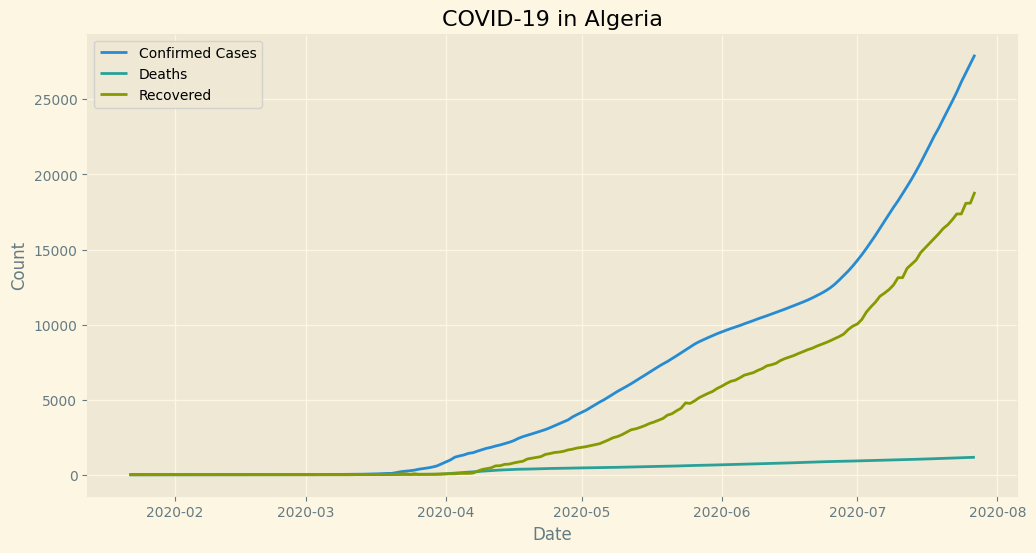

In [ ]:
import matplotlib.pyplot as plt
country = 'Algeria'
country_data = data[data['Country/Region'] == country]
country_data['Date'] = pd.to_datetime(country_data['Date'])
plt.figure(figsize=(12, 6))
plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')
plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths')
plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered')
plt.title(f'COVID-19 in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**Menampilkan jumlah status Confirmed, Deaths, Recovered and Active **

Text(0.5, 1.0, 'Count of Population Status')

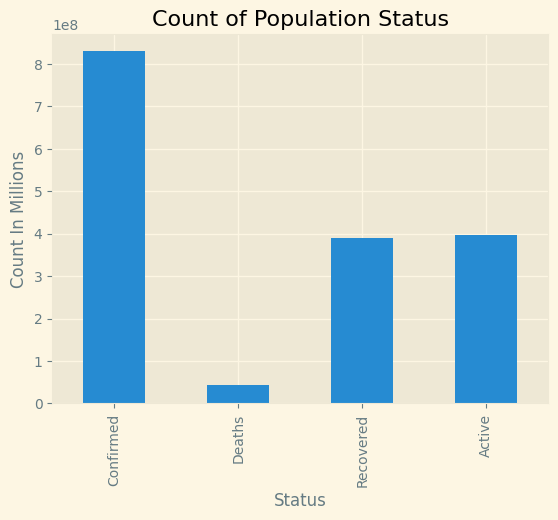

In [ ]:
# Total number of Confirmed, Deaths, Recovered and Active cases around the world
status_count = ['Confirmed', 'Deaths', 'Recovered', 'Active']

#Calculate the sum of specified columns, grouped by status
column_sums = data[status_count].sum().plot(kind='bar')
plt.xlabel("Status")
plt.ylabel("Count In Millions")
plt.title("Count of Population Status")

In [ ]:
Region = data.groupby(by = 'WHO Region').sum()
Region.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,,,,
Africa,0,AlgeriaAngolaBeninBurkina FasoCabo VerdeCamero...,4727.394420,141787.234772,2020-01-222020-01-222020-01-222020-01-222020-0...,21791827,439978,11193730,10158119
Americas,AlbertaBritish ColumbiaManitobaNew BrunswickNe...,Antigua and BarbudaArgentinaBahamasBarbadosBol...,161412.174448,-670370.994644,2020-01-222020-01-222020-01-222020-01-222020-0...,402261194,19359292,157069444,225832458
Eastern Mediterranean,0,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,108204.921108,169780.964744,2020-01-222020-01-222020-01-222020-01-222020-0...,74082892,1924029,48050703,24108160
Europe,Faroe IslandsGreenlandFrench GuianaFrench Poly...,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,567986.485104,103258.565532,2020-01-222020-01-222020-01-222020-01-222020-0...,248879793,19271040,123202075,106406678
South-East Asia,0,BangladeshBhutanIndiaIndonesiaMaldivesNepalSri...,26161.732764,175703.419516,2020-01-222020-01-222020-01-222020-01-222020-0...,55118365,1458134,30030327,23629904


**Menampilkan kasus yang terkonfirmasi Covid-19 pada WHO Region**

Text(0.5, 1.0, 'Confirmed Grouped By WHO Region')

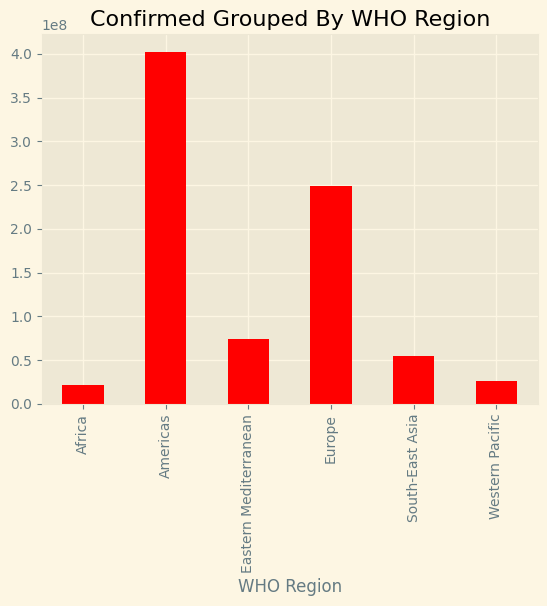

In [ ]:
# Total Deaths grouped by WHO Region
Region['Confirmed'].plot(kind='bar',color = 'red')
plt.title('Confirmed Grouped By WHO Region')


**Menampilkan kasus meninggal karena Covid-19 pada WHO Region**

Text(0.5, 1.0, 'Deaths Grouped By WHO Region')

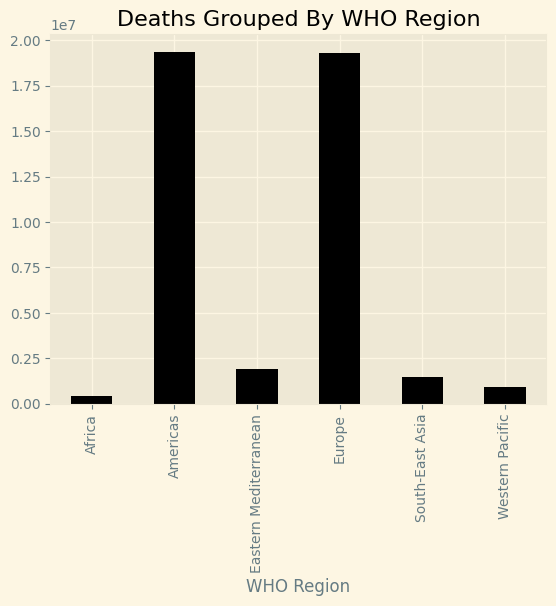

In [ ]:
# Total Deaths grouped by WHO Region
Region['Deaths'].plot(kind='bar', color = "black")
plt.title('Deaths Grouped By WHO Region')

**Menampilkan kasus yang berhasil dari Covid-19 pada WHO Region**

Text(0.5, 1.0, 'Recovered Grouped By WHO Region')

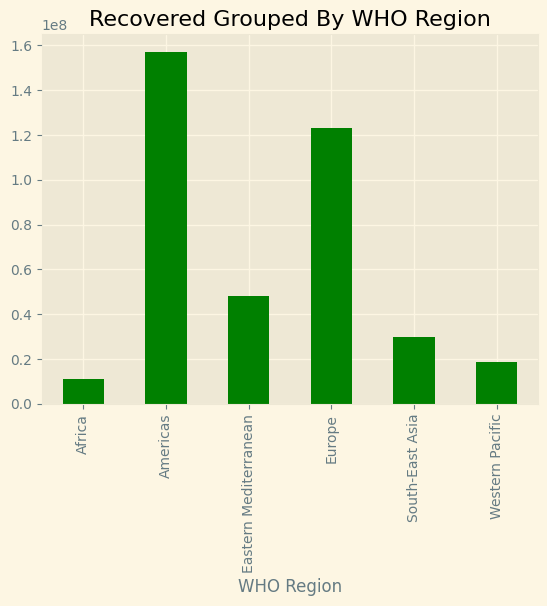

In [ ]:
# Total Recovered grouped by WHO Region
Region['Recovered'].plot(kind='bar', color = "green")
plt.title('Recovered Grouped By WHO Region')

In [ ]:
dataframe=data[['WHO Region','Confirmed','Deaths', 'Recovered', 'Active']].groupby('WHO Region').mean().round(2).sort_values(by='Confirmed', ascending=False)

In [ ]:
dataframe

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Americas,46514.94,2238.59,18162.52,26113.84
South-East Asia,29318.28,775.60,15973.58,12569.10
Eastern Mediterranean,17911.72,465.19,11617.67,5828.86
Europe,16547.86,1281.32,8191.63,7074.91
Western Pacific,2550.72,90.18,1824.17,636.37
Africa,2414.87,48.76,1240.44,1125.68


**Mencari persen dari Recovered, Active dan Death berdasarkan WHO Region**

In [ ]:
perc_list =[]
list1=[]
list2=[]
for i in range(len(dataframe)):
    perc_recovered=round(dataframe['Recovered'][i]*100/dataframe['Confirmed'][i], 2)
    perc_death= round((dataframe['Deaths'][i]*100)/dataframe['Confirmed'][i],2)
    perc_active = round((dataframe['Active'][i]*100)/dataframe['Confirmed'][i],2)
    perc_list.append(perc_recovered)
    list1.append(perc_death)
    list2.append(perc_active)
dataframe['perc_recovered'] =perc_list
dataframe['perc_active']=list2
dataframe['perc_death']= list1
dataframe=dataframe.reset_index()
dataframe

,WHO Region,Confirmed,Deaths,Recovered,Active,perc_recovered,perc_active,perc_death
0,Americas,46514.94,2238.59,18162.52,26113.84,39.05,56.14,4.81
1,South-East Asia,29318.28,775.60,15973.58,12569.10,54.48,42.87,2.65
2,Eastern Mediterranean,17911.72,465.19,11617.67,5828.86,64.86,32.54,2.60
3,Europe,16547.86,1281.32,8191.63,7074.91,49.50,42.75,7.74
4,Western Pacific,2550.72,90.18,1824.17,636.37,71.52,24.95,3.54
5,Africa,2414.87,48.76,1240.44,1125.68,51.37,46.61,2.02


In [ ]:
frame=data[['Country/Region','Confirmed', 'Deaths', 'Recovered', 'Active']].groupby('Country/Region').mean().round(2).sort_values(by='Confirmed', ascending=False).reset_index()
frame

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,1193329.51,58571.34,299752.21,835005.96
1,Brazil,476196.63,20946.99,289855.71,165393.94
2,Russia,241534.10,3294.60,133619.40,104620.10
3,India,217465.23,5913.99,126509.15,85042.09
4,Spain,145766.20,16133.14,80285.02,49348.04
...,...,...,...,...,...
182,Saint Kitts and Nevis,9.43,0.00,6.89,2.54
183,Greenland,8.02,0.00,7.30,0.72
184,Holy See,7.21,0.00,3.95,3.27
185,Papua New Guinea,6.30,0.01,3.70,2.60


In [ ]:
dataf=frame[0:10]
dataf

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,1193329.51,58571.34,299752.21,835005.96
1,Brazil,476196.63,20946.99,289855.71,165393.94
2,Russia,241534.10,3294.60,133619.40,104620.10
3,India,217465.23,5913.99,126509.15,85042.09
4,Spain,145766.20,16133.14,80285.02,49348.04
5,Italy,142261.41,19721.90,83371.86,39167.65
6,Germany,112016.77,4634.69,90999.14,16382.93
7,Iran,102868.44,5447.53,80855.82,16565.09
8,Peru,102467.64,3468.69,57781.10,41217.86
9,Turkey,95230.56,2479.02,70986.11,21765.43


**Menampilkan pie chart untuk 10 negara yang terkonfirmasi paling banyak**

([<matplotlib.patches.Wedge at 0x7fab063140a0>,
 [Text(0.267529945932647, 1.0669712873499808, 'US'),
  Text(-1.0992289971435272, -0.04117780760112789, 'Brazil'),
  Text(-0.738750639073364, -0.8150137994345228, 'Russia'),
  Text(-0.24719925307470775, -1.0718640442142402, 'India'),
  Text(0.1933439536579662, -1.082874930720952, 'Spain'),
  Text(0.5240085100685903, -0.9671685899447399, 'Italy'),
  Text(0.7727344093571065, -0.7828675064118602, 'Germany'),
  Text(0.935877753091941, -0.578042240037508, 'Iran'),
  Text(1.0423172181579592, -0.35153209914807687, 'Peru'),
  Text(1.0938552648809579, -0.11610624226203252, 'Turkey')],
 [Text(0.19456723340556148, 0.7759791180727132, '42.18%'),
  Text(-0.799439270649838, -0.029947496437183918, '16.83%'),
  Text(-0.5372731920533557, -0.5927373086796529, '8.54%'),
  Text(-0.1797812749634238, -0.7795374867012657, '7.69%'),
  Text(0.14061378447852088, -0.7875454041606923, '5.15%'),
  Text(0.381097098231702, -0.7033953381416289, '5.03%'),
  Text(0.5619886

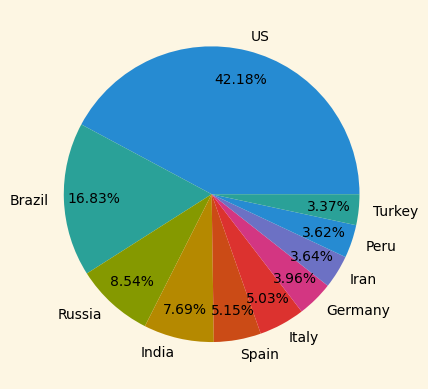

In [ ]:
plt.pie(dataf['Confirmed'], labels=dataf['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

**Top 10 negara yang recovered**

In [ ]:
frame1=data[['Country/Region', 'Recovered',]].groupby('Country/Region').mean().round(2).sort_values(by='Recovered', ascending=False).reset_index()[0:10]
frame1

,Country/Region,Recovered
0,US,299752.21
1,Brazil,289855.71
2,Russia,133619.40
3,India,126509.15
4,Germany,90999.14
5,Italy,83371.86
6,Iran,80855.82
7,Spain,80285.02
8,Turkey,70986.11
9,Chile,70705.28


**Menampilkan pie chart**

([<matplotlib.patches.Wedge at 0x7fab0617ed70>,
 [Text(0.8294059409586141, 0.7225550394970311, 'US'),
  Text(-0.5801197929682776, 0.9345913683564828, 'Brazil'),
  Text(-1.0999956201093433, 0.0031041488787619696, 'Russia'),
  Text(-0.8958398179967997, -0.6383345678337192, 'India'),
  Text(-0.48566385463109046, -0.986980557207117, 'Spain'),
  Text(-0.07255545413976003, -1.0976045308190803, 'Italy'),
  Text(0.3781015060708015, -1.0329759199066508, 'Germany'),
  Text(0.759216652193208, -0.795983715306122, 'Iran'),
  Text(0.9769221623305827, -0.5055918202931481, 'Peru'),
  Text(1.0841959840349709, -0.18579307899499775, 'Turkey')],
 [Text(0.6032043206971739, 0.525494574179659, '22.81%'),
  Text(-0.42190530397692916, 0.6797028133501692, '22.06%'),
  Text(-0.799996814624977, 0.0022575628209177963, '10.17%'),
  Text(-0.6515198676340361, -0.4642433220608867, '9.63%'),
  Text(-0.3532100760953385, -0.717804041605176, '6.11%'),
  Text(-0.05276760301073457, -0.7982578405956948, '6.34%'),
  Text(0.27

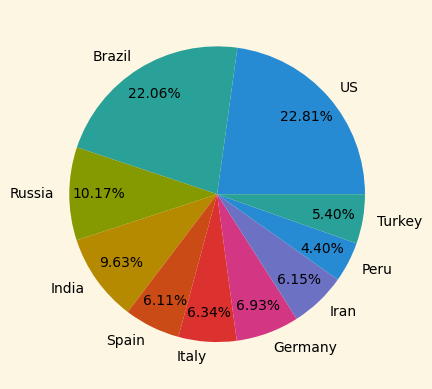

In [ ]:
plt.pie(dataf['Recovered'], labels=dataf['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

**Top 5 dari data **

In [ ]:
data.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Top 10 negara dengan kasus yang paling banyak**

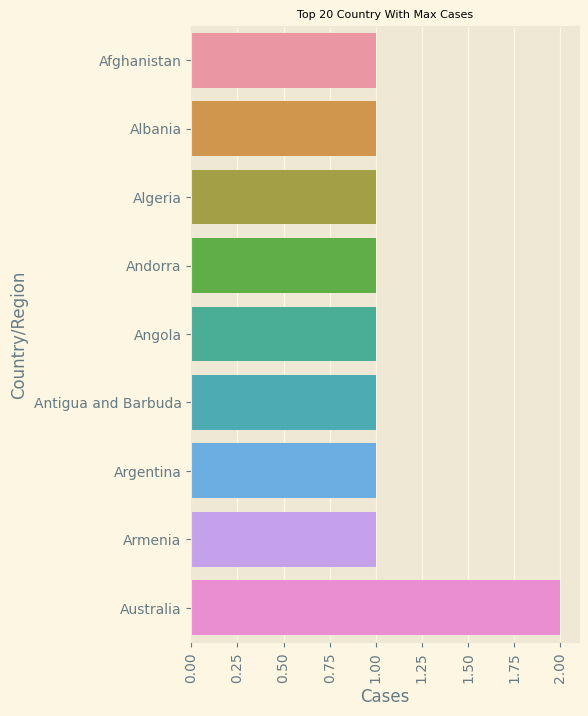

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(5,8))
sns.countplot(data.head(10),y='Country/Region')                    #Note here we are using countplot as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')                                    #Note use of ticks for a better view of diagram.
plt.title('Top 20 Country With Max Cases',fontsize=8)            #Note labelling the data
plt.xlabel('Cases')
plt.show()